# 1. Cargamos las librerías

In [2]:
from pprint import pprint
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.axes as ax
import seaborn as sns
import plotly.express as px
import scipy
from scipy import stats
import os
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.subplots as su
from sklearn.linear_model import LinearRegression

# 2. Cargamos los datos extraídos por ciudades entre 2021 y 2025:

## - Pontevedra 

In [3]:
# Creamos una función para añadir una columna con las estaciones a los dataframes
def estacion(m):
    if   m in [12, 1, 2]: return "Invierno"
    elif m in [3, 4, 5]:  return "Primavera"
    elif m in [6, 7, 8]:  return "Verano"
    else:                 return "Otoño"

In [25]:
df_ponte = pd.concat(objs = [pd.read_csv(x) for x in os.listdir() if x.startswith("ponte") and x.endswith(".csv")],
                     ignore_index = True)

df_ponte = df_ponte.drop(labels = "Unnamed: 0", axis = 1)

df_ponte["Fecha"] = df_ponte["Fecha"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))
df_ponte["Year"] = df_ponte["Fecha"].apply(lambda x : x.year)
df_ponte["Estacion"] = df_ponte["Fecha"].dt.month.apply(estacion)
df_ponte["Mes"] = df_ponte["Fecha"].apply(lambda x : x.month)

rename_columns = {"Momento (UNIX) de la vel. máx. del veinto" : "Momento (UNIX) de la vel. máx. del viento",
                  "Profundidad de la neive" : "Profundidad de la nieve",
                  "Vel. ráfaga de viento max." : "Vel. ráfaga de viento máx."}

df_ponte = df_ponte.rename(columns = rename_columns)

#df_ponte

## - A Coruña

In [5]:
df_coruña = pd.concat(objs = [pd.read_csv(x) for x in os.listdir() if x.startswith("coruña") and x.endswith(".csv")],
                     ignore_index = True)

df_coruña = df_coruña.drop(labels = "Unnamed: 0", axis = 1)

df_coruña["Fecha"] = df_coruña["Fecha"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))

df_coruña["Year"] = df_coruña["Fecha"].apply(lambda x : x.year)
df_coruña["Estacion"] = df_coruña["Fecha"].dt.month.apply(estacion)
df_coruña["Mes"] = df_coruña["Fecha"].apply(lambda x : x.month)

rename_columns = {"Momento (UNIX) de la vel. máx. del veinto" : "Momento (UNIX) de la vel. máx. del viento",
                  "Profundidad de la neive" : "Profundidad de la nieve",
                  "Vel. ráfaga de viento max." : "Vel. ráfaga de viento máx."}

df_coruña = df_coruña.rename(columns = rename_columns)

#df_coruña

## - Caldes de Montbui

In [6]:
df_caldes = pd.concat(objs = [pd.read_csv(x) for x in os.listdir() if x.startswith("caldes") and x.endswith(".csv")],
                     ignore_index = True)

df_caldes = df_caldes.drop(labels = "Unnamed: 0", axis = 1)

df_caldes["Fecha"] = df_caldes["Fecha"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))

df_caldes["Year"] = df_caldes["Fecha"].apply(lambda x : x.year)

df_caldes = df_caldes.rename(columns = rename_columns)

#df_caldes

## - Palma del Río

In [7]:
df_palmadr = pd.concat(objs = [pd.read_csv(x) for x in os.listdir() if x.startswith("palmadr") and x.endswith(".csv")],
                     ignore_index = True)

df_palmadr = df_palmadr.drop(labels = "Unnamed: 0", axis = 1)

df_palmadr["Fecha"] = df_palmadr["Fecha"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))

df_palmadr["Year"] = df_palmadr["Fecha"].apply(lambda x : x.year)
df_palmadr["Mes"] = df_palmadr["Fecha"].apply(lambda x : x.month)
df_palmadr["Estacion"] = df_palmadr["Fecha"].dt.month.apply(estacion)

rename_columns = {"Momento (UNIX) de la vel. máx. del veinto" : "Momento (UNIX) de la vel. máx. del viento",
                  "Profundidad de la neive" : "Profundidad de la nieve",
                  "Vel. ráfaga de viento max." : "Vel. ráfaga de viento máx."}

df_palmadr = df_palmadr.rename(columns = rename_columns)

df_palmadr.columns

Index(['Ciudad', 'Fecha', 'Fecha (UNIX)', 'Presión atmosférica',
       'Presión Atm. sobre Nvl. del mar', 'Media de la vel. del viento (m/s)',
       'Vel. ráfaga de viento máx.', 'Máx. vel. del viento /2min',
       'Momento (UNIX) de la vel. máx. del viento',
       'Media de la dirección del viento', 'Media de la temperatura',
       'Temperatura máxima', 'Temperatura mínima',
       'Momento temperatura máxima (UNIX)',
       'Momento temperatura mínima (UNIX)', 'Media humedad',
       'Media punto de rocío', 'Media de % de nubes en la zona',
       'Acumulación de precipitaciones (l/m2)',
       'Acumulación de precipitaciones (l/m2) (NASA)',
       'Acumulación de nieve (l/m2)', 'Profundidad de la nieve',
       'Media de radiación solar (W/m2)', 'Total de radiación solar (W/m2)',
       'Media de la radiación solar horizontal',
       'Total de la radiación solar horizontal',
       'Máximo de la radiación solar horizontal',
       'Media de la radiación solar concentrada',
   

# 3. Hacemos un DataFrame con todo usando la concatenación

In [20]:
df_conjunto = pd.concat(objs = [pd.read_csv(x) for x in os.listdir() if x.startswith("df_") and x.endswith(".csv")],
                     ignore_index = True)
df_conjunto = df_conjunto.drop(labels = "Unnamed: 0", axis = 1)

#df_conjunto

# 4. Preguntas

### 4.1. ¿Hace más viento en el norte o en el sur de Galicia ? 

In [21]:
# Respuesta:

viento = df_conjunto.groupby(by = "Ciudad").agg({"Media de la vel. del viento (m/s)": "mean"})

viento_AC = viento.loc["A Coruña"]
print("- El viento en A Coruña es: ", viento_AC[0], "m/s")

viento_P = viento.loc["Pontevedra"]
print("- El viento en Pontevedra es: ", viento_P[0], "m/s")

if viento_AC[0] > viento_P[0]:
    print ("Hace más viento en el norte")
elif viento_AC[0] == viento_P[0]:
    print("Hace el mismo viento en ambos lugares")
else:
    print("Hace más viento en el sur")

- El viento en A Coruña es:  3.460164271047228 m/s
- El viento en Pontevedra es:  1.9745379876796716 m/s
Hace más viento en el norte


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10328\890263249.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10328\890263249.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10328\890263249.py:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



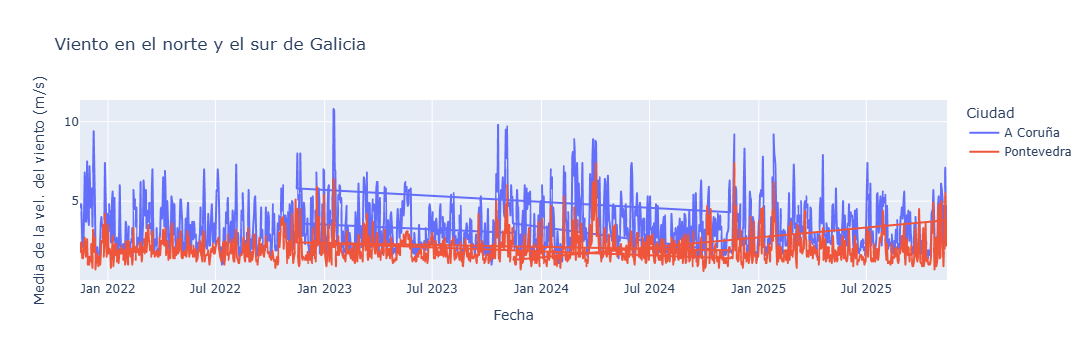

In [85]:
#Filtramos el Dataframe para elegir solamente las ciudades pertenecientes a Galicia:

df_Galicia = df_conjunto[df_conjunto["Ciudad"].isin(["A Coruña", "Pontevedra"])]

# Gráfica de apoyo:

fig = px.line(df_Galicia,
              x = "Fecha",
              y = "Media de la vel. del viento (m/s)",
              title = "Viento en el norte y el sur de Galicia",
              color = "Ciudad",
              # markers = True,
              category_orders = {"Ciudad": ["A Coruña", "Pontevedra"]})

fig.show()

### 4.2. ¿Cuál es el mes más caluroso por ciudad?

In [38]:
calor = df_conjunto.groupby(by = ["Ciudad", "Mes"]).agg({"Temperatura máxima": "max",})
calor

mes_caluroso = calor.loc[calor.groupby("Ciudad")["Temperatura máxima"].idxmax()]
mes_caluroso

,,Temperatura máxima
Ciudad,Mes,
A Coruña,10,33.3
Caldes de Montbui,7,40.0
Palma del Río,8,43.0
Pontevedra,7,38.7


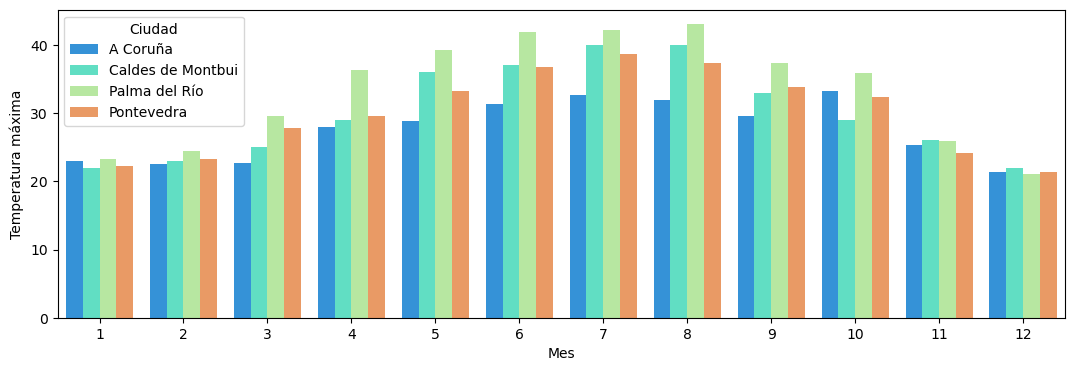

In [84]:
# Gráfica de apoyo:

plt.figure(figsize = (13, 4),)

sns.barplot(x = "Mes", y = "Temperatura máxima", hue = "Ciudad", data = calor, palette = "rainbow")

plt.show()

### 4.2. ¿La temperatura y la humedad influyen en el punto de rocío? 

Veamos que ocurre en dos ciudades del norte de España

**Caldes de Montbui**


Para ver esto haremos regresión lineal múltiple:

In [16]:
X = df_caldes[["Media de la temperatura", "Media humedad"]]
Y = df_caldes["Media punto de rocío"]

model = LinearRegression()
model.fit(X, Y)

print("Intercept:", model.intercept_)
print("Coeficientes:", model.coef_)
print("R²:", model.score(X, Y))

Intercept: -22.85649697134695
Coeficientes: [0.95251471 0.25107619]
R²: 0.9943408473773464


**Interpretación de los datos:**
Podemos sacar varias conclusiones que físicamente tienen mucho sentido. 
Lo primero, el valor obtenido de los coeficientes indica que el punto de rocío está determinado casi linealmente sobre todo por la temperatura (coeficiente = 0.95251471) y en menor medida por la humedad (coeficiente= 0.25107619).
La temperatura es la variable principal que controla la capacidad del aire para saturarse y la humedad se encarga de regular.

**Pontevedra**

Para ver esto haremos regresión lineal múltiple:

In [17]:
X = df_ponte[["Media de la temperatura", "Media humedad"]]
Y = df_ponte["Media punto de rocío"]

model = LinearRegression()
model.fit(X, Y)

print("Intercept:", model.intercept_)
print("Coeficientes:", model.coef_)
print("R²:", model.score(X, Y))

Intercept: -20.494737602915464
Coeficientes: [0.95552187 0.21709311]
R²: 0.9946652479335619


**Interpretación de los datos:** Nuevamente los datos vuelven a tener mucho sentido y de hecho son resultados muy similares a Caldes. La temperatura vuelve a ser la variable principal. Además, seguimos obteniendo un R^2 alto (aprox. 0.99) lo cuál es muy buen indicativo de que mis variables (Temperatura y humedad) explican el modelo. 

### 4.3. ¿Hay correlación entre la temperatura máxima y el índice de radiación solar?

Esta vez lo veremos en una ciudad del sur y una del norte de España

**Palma del Río**

In [23]:
stats.pearsonr(df_palmadr["Temperatura máxima"],df_palmadr["Total de la radiación solar concentrada"])

PearsonRResult(statistic=np.float64(0.7577650845640193), pvalue=np.float64(8.703915049731881e-273))

Usaremos una **gráfica** para visualizar los resultados, que indican una correlación fuerte entre estas variables, lo cuál fisicamente tiene mucho sentido. La mejor gráfica en estos casos es un scatter plot con línea de tendencia que según los datos obtenidos tendría que salir una línea creciente y una nube de puntos agrupada y también creciente. 

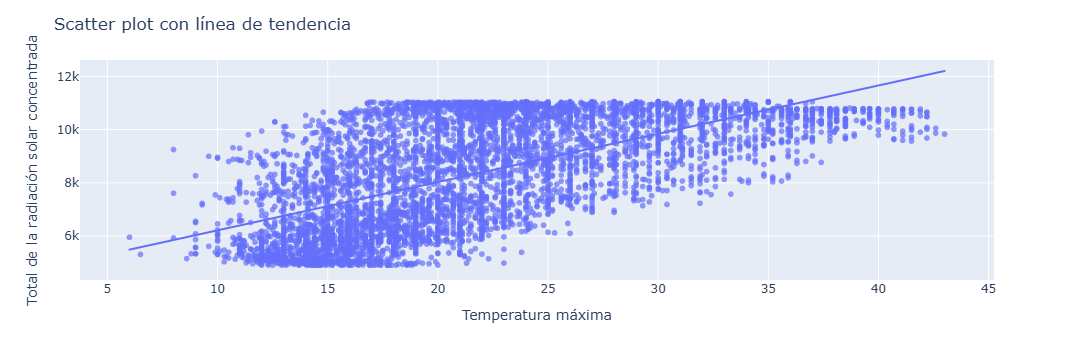

In [19]:
fig = px.scatter(
    df_conjunto,
    x="Temperatura máxima",
    y="Total de la radiación solar concentrada",
    trendline="ols",  
    opacity=0.7
)

fig.update_layout(
    title="Scatter plot con línea de tendencia",
    xaxis_title="Temperatura máxima",
    yaxis_title="Total de la radiación solar concentrada"
)

fig.show()

### Comparación de temperaturas máxima, media y mínima entre 2021 y 2025 por ciudades

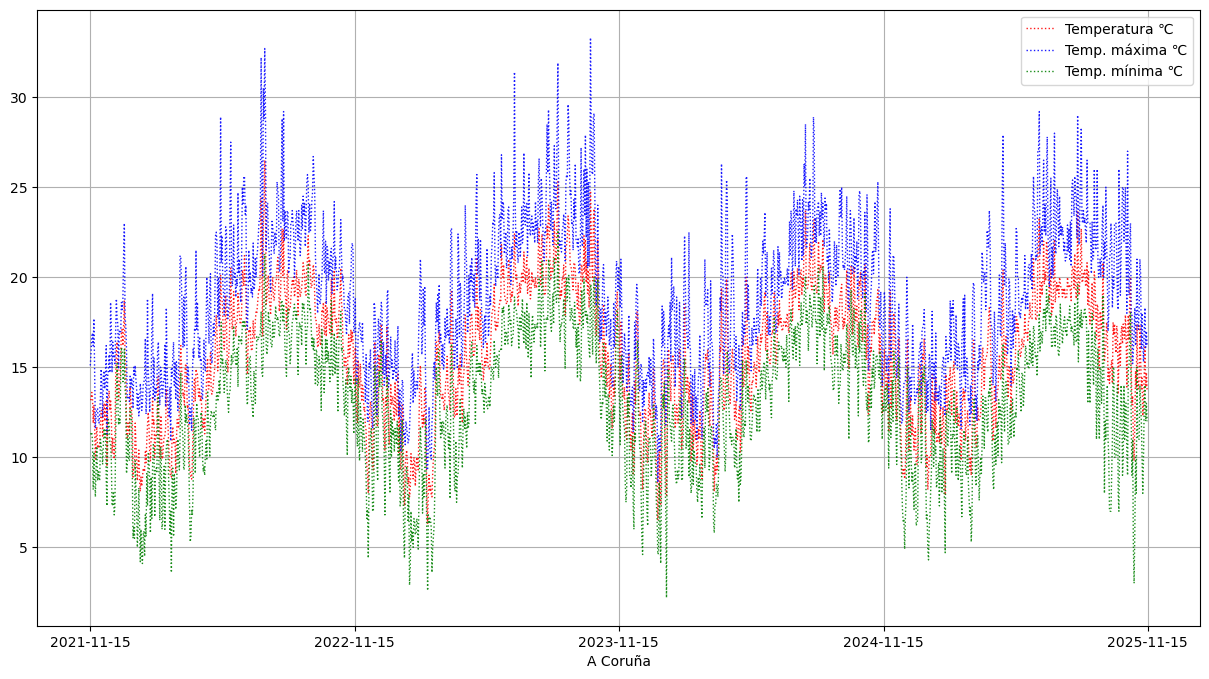

In [24]:
X = df_coruña["Fecha"]
Y1 = df_coruña["Media de la temperatura"]
Y2 = df_coruña["Temperatura máxima"]
Y3 = df_coruña["Temperatura mínima"]

colores = ["red", "blue", "green"]

plt.figure(figsize = (15, 8))

plt.plot(X,
         Y1, 
         color       = "red",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temperatura ℃") 

plt.plot(X,
         Y2, 
         color       = "blue",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. máxima ℃") 

plt.plot(X,
         Y3, 
         color       = "green",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. mínima ℃") 


plt.xlabel("A Coruña")
plt.legend()
plt.xticks([18_946, 19_311, 19_676, 20_042, 20_407])
plt.grid()
plt.show()

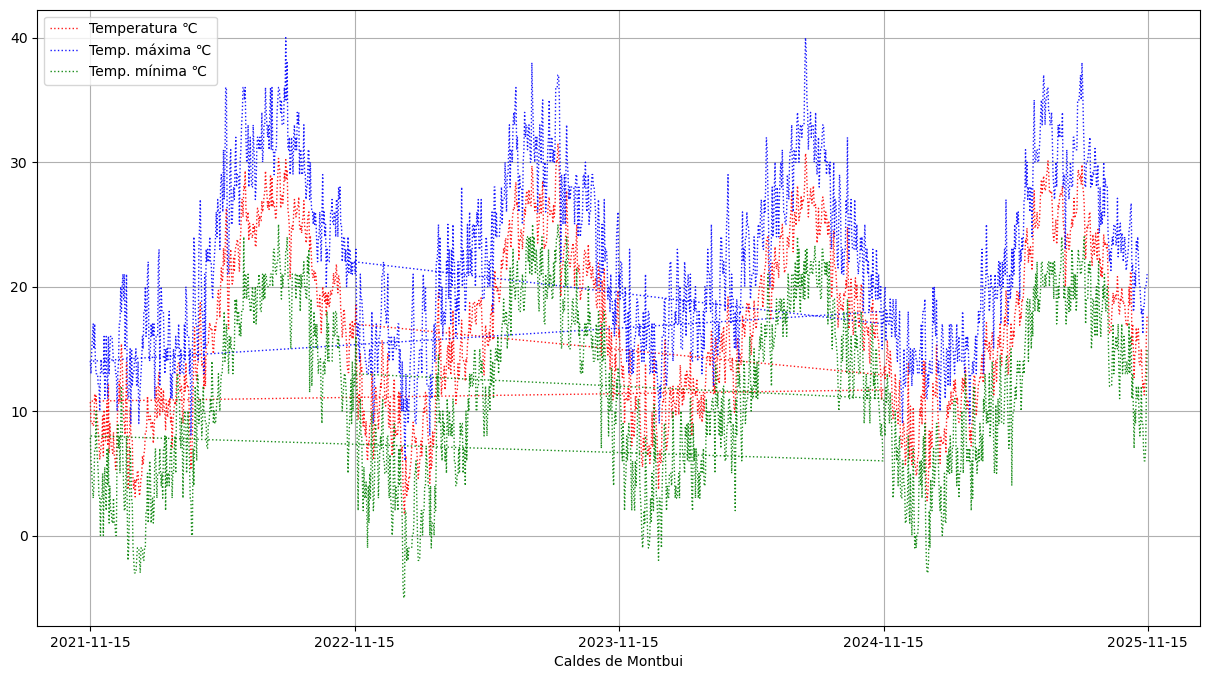

In [27]:
X = df_caldes["Fecha"]
Y1 = df_caldes["Media de la temperatura"]
Y2 = df_caldes["Temperatura máxima"]
Y3 = df_caldes["Temperatura mínima"]

colores = ["red", "blue", "green"]

plt.figure(figsize = (15, 8))

plt.plot(X,
         Y1, 
         color       = "red",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temperatura ℃") 

plt.plot(X,
         Y2, 
         color       = "blue",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. máxima ℃") 

plt.plot(X,
         Y3, 
         color       = "green",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. mínima ℃") 


plt.xlabel("Caldes de Montbui")
plt.legend()
plt.xticks([18_946, 19_311, 19_676, 20_042, 20_407])
plt.grid()
plt.show()

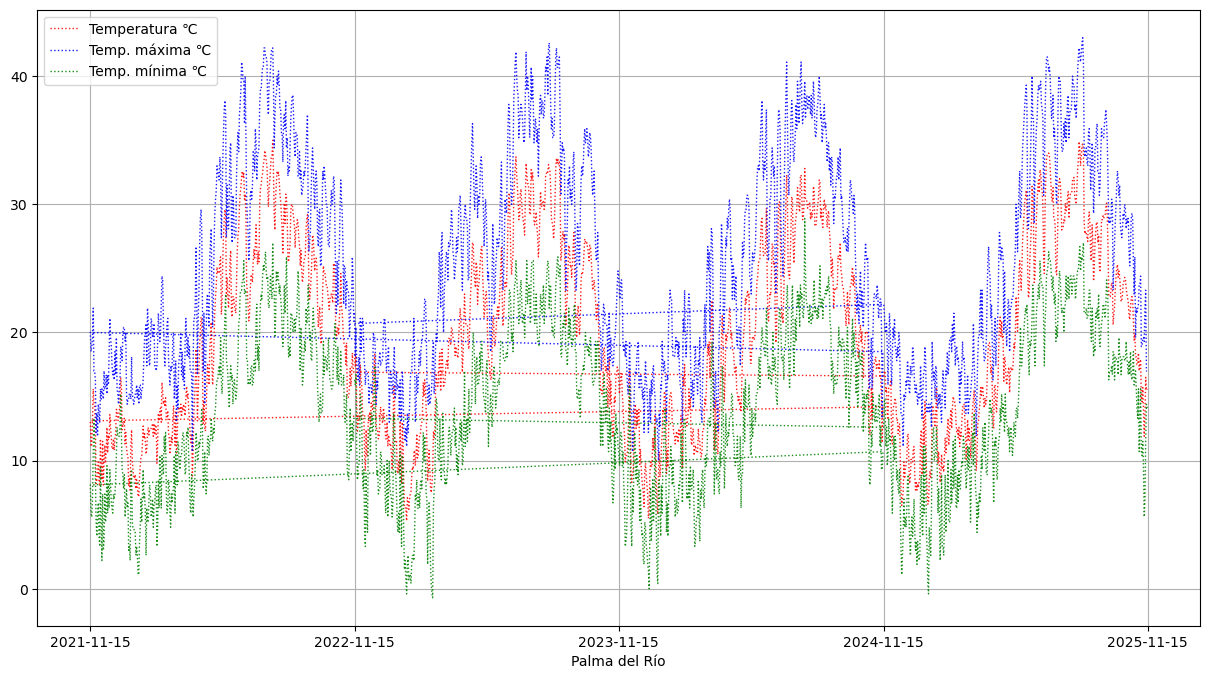

In [28]:
X = df_palmadr["Fecha"]
Y1 = df_palmadr["Media de la temperatura"]
Y2 = df_palmadr["Temperatura máxima"]
Y3 = df_palmadr["Temperatura mínima"]

colores = ["red", "blue", "green"]

plt.figure(figsize = (15, 8))

plt.plot(X,
         Y1, 
         color       = "red",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temperatura ℃") 

plt.plot(X,
         Y2, 
         color       = "blue",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. máxima ℃") 

plt.plot(X,
         Y3, 
         color       = "green",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. mínima ℃") 


plt.xlabel("Palma del Río")
plt.legend()
plt.xticks([18_946, 19_311, 19_676, 20_042, 20_407])
plt.grid()
plt.show()

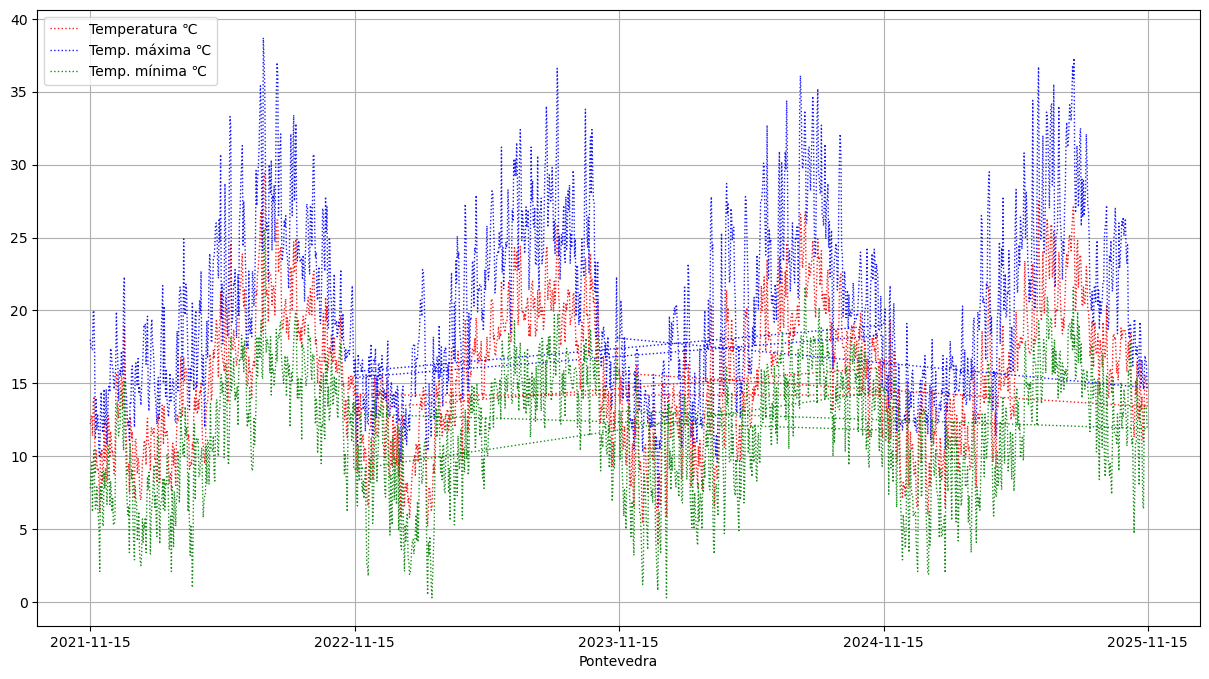

In [29]:
X = df_ponte["Fecha"]
Y1 = df_ponte["Media de la temperatura"]
Y2 = df_ponte["Temperatura máxima"]
Y3 = df_ponte["Temperatura mínima"]

colores = ["red", "blue", "green"]

plt.figure(figsize = (15, 8))

plt.plot(X,
         Y1, 
         color       = "red",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temperatura ℃") 

plt.plot(X,
         Y2, 
         color       = "blue",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. máxima ℃") 

plt.plot(X,
         Y3, 
         color       = "green",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. mínima ℃") 


plt.xlabel("Pontevedra")
plt.legend()
plt.xticks([18_946, 19_311, 19_676, 20_042, 20_407])
plt.grid()
plt.show()

### b) Evolución de la temperatura media, máxima y mínima en este período

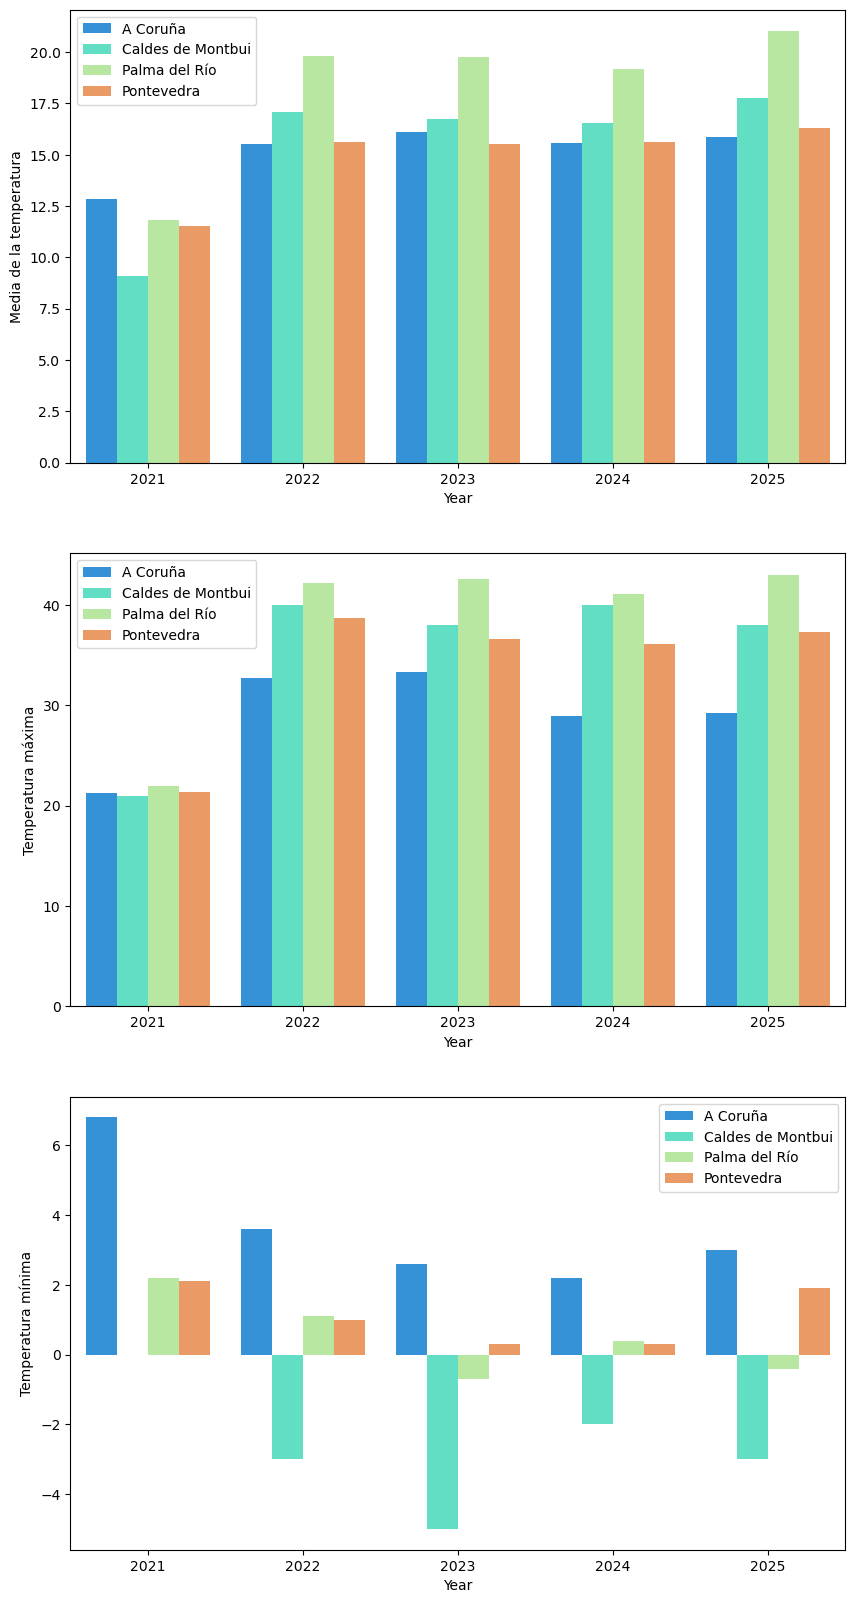

In [115]:
plt.figure(figsize = (10,20))

plt.subplot(3, 1, 1) 
sns.barplot(x = "Year", 
            y = "Media de la temperatura", 
            hue = "Ciudad", 
            data = df.groupby(by = ["Year", "Ciudad"]).agg({"Media de la temperatura": "mean"}), 
            palette = "rainbow")
plt.yticks([-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

plt.legend(loc="upper left",
           fontsize=10)

plt.subplot(3, 1, 2)
sns.barplot(x = "Year", 
            y = "Temperatura máxima", 
            hue = "Ciudad", 
            data = df.groupby(by = ["Year", "Ciudad"]).agg({"Temperatura máxima": "max"}), 
            palette = "rainbow")
plt.yticks([-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

plt.legend(loc="upper left",
           fontsize=10)

plt.subplot(3,1, 3)
sns.barplot(x = "Year", 
            y = "Temperatura mínima", 
            hue = "Ciudad", 
            data = df.groupby(by = ["Year", "Ciudad"]).agg({"Temperatura mínima": "min"}), 
            palette = "rainbow")
plt.yticks([-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

plt.legend(loc="upper right",
           fontsize=10)

plt.show()

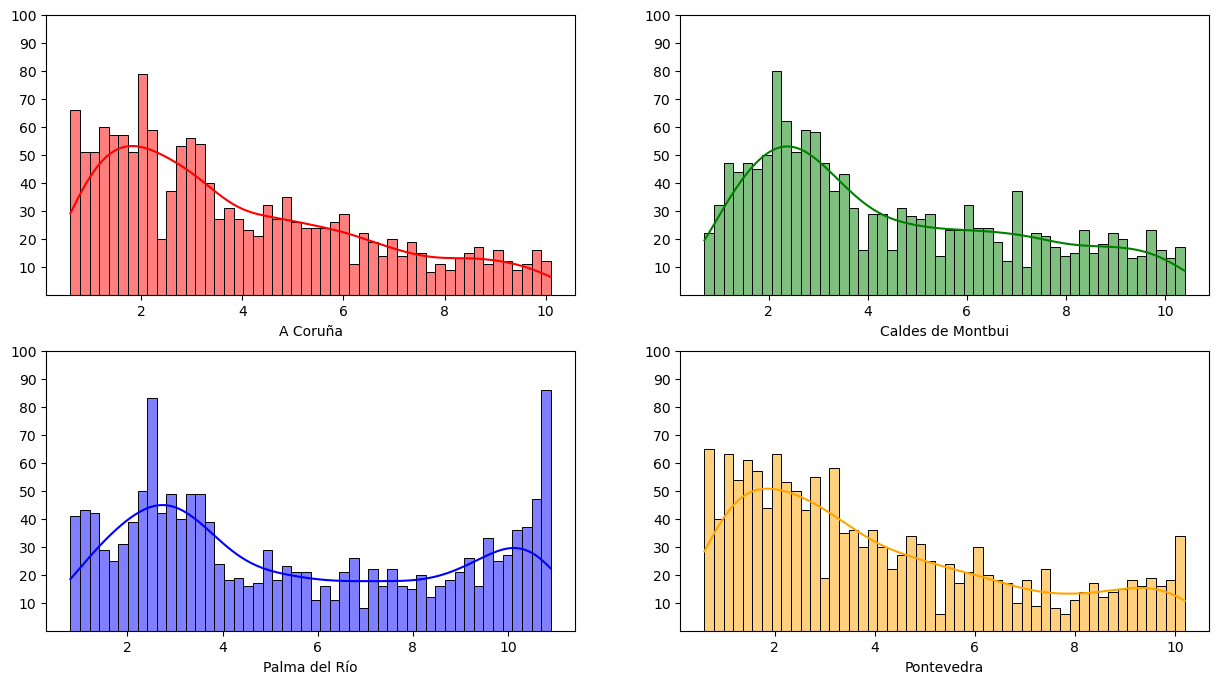

In [132]:
plt.figure(figsize = (15, 8))

plt.subplot(2, 2, 1)  
sns.histplot(df_coruña["Índice máximo de rayos ultravioleta"],
             color = "red",
             bins = 50,
             kde = True)
plt.xlabel("A Coruña")
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel("")

plt.subplot(2, 2, 2)  
sns.histplot(df_caldes["Índice máximo de rayos ultravioleta"],
             color = "green",
             bins = 50,
             kde = True)
plt.xlabel("Caldes de Montbui")
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel("")

plt.subplot(2, 2, 3)  
sns.histplot(df_palmadr["Índice máximo de rayos ultravioleta"],
             color = "blue",
             bins = 50,
             kde = True)
plt.xlabel("Palma del Río")
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel("")

plt.subplot(2, 2, 4)  
sns.histplot(df_ponte["Índice máximo de rayos ultravioleta"],
             color = "orange",
             bins = 50,
             kde = True)
plt.xlabel("Pontevedra")
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel("")

plt.show()

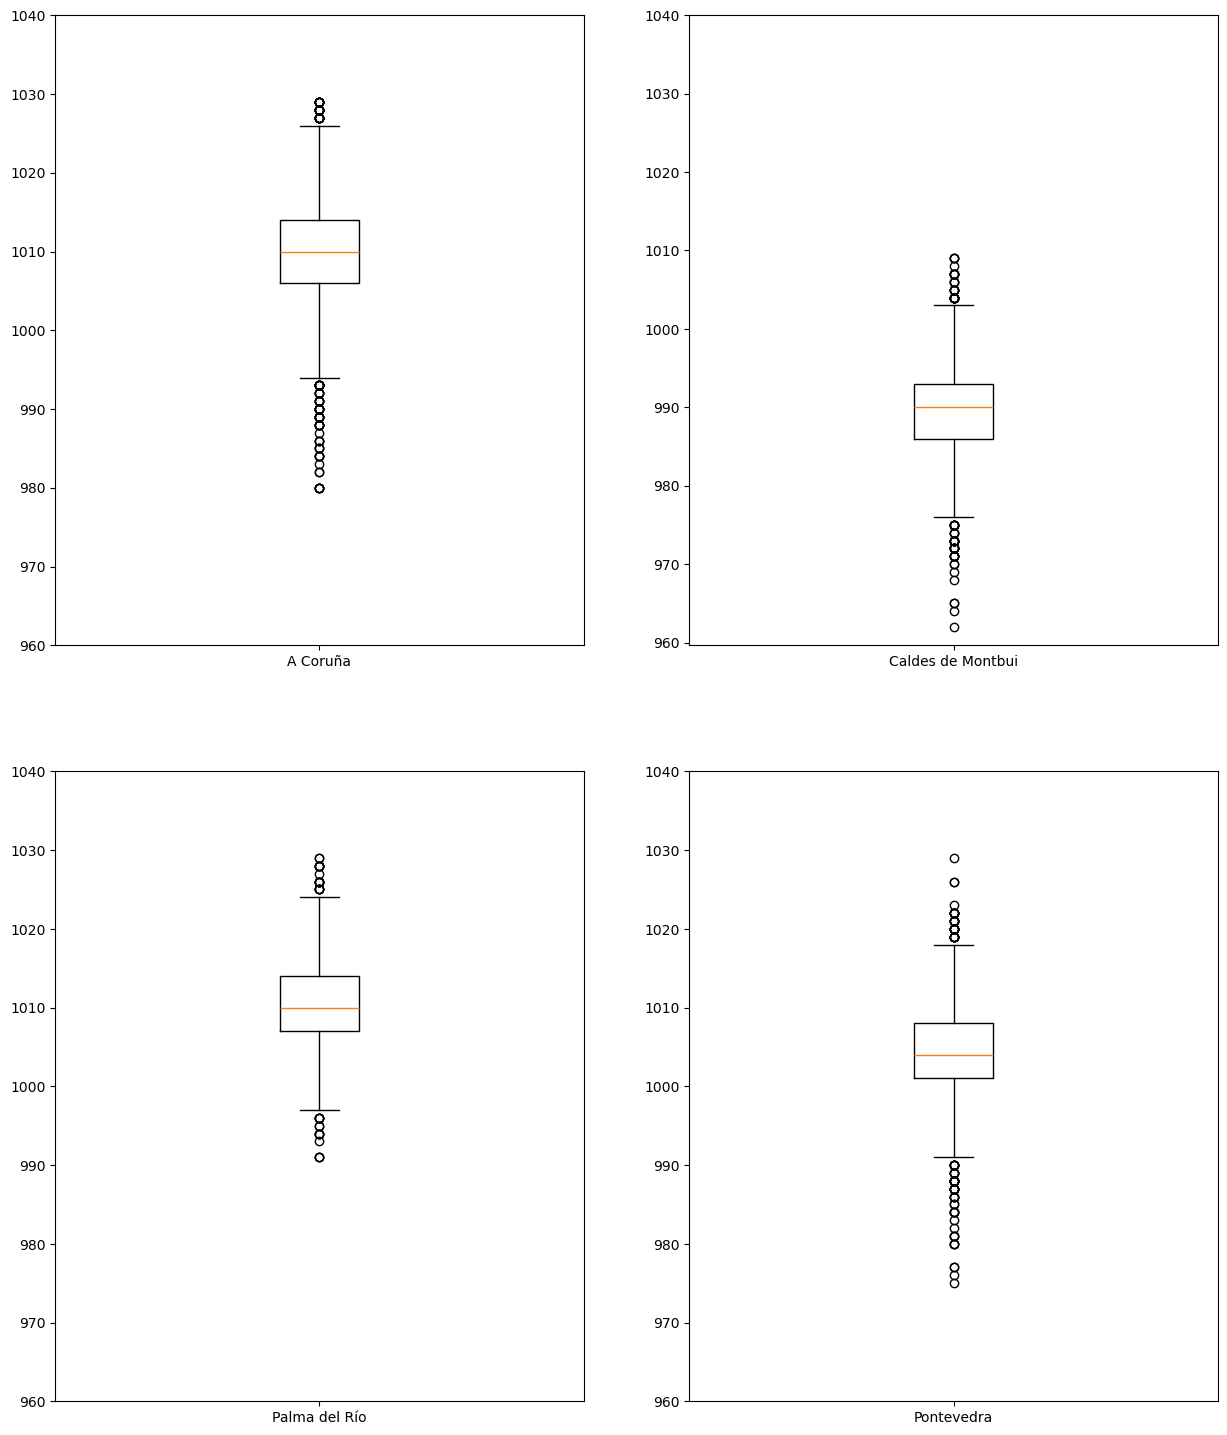

In [227]:
plt.figure(figsize = (15, 18))

plt.subplot(2, 2, 1)  
plt.boxplot(x = df_coruña["Presión atmosférica"],
            tick_labels = ["A Coruña"])
plt.yticks([960, 970, 980, 990, 1_000, 1_010, 1_020, 1_030, 1_040])
plt.ylabel("")

plt.subplot(2, 2, 2) 
plt.boxplot(x = df_caldes["Presión atmosférica"],
            tick_labels = ["Caldes de Montbui"])
plt.yticks([960, 970, 980, 990, 1_000, 1_010, 1_020, 1_030, 1_040])
plt.ylabel("")

plt.subplot(2, 2, 3) 
plt.boxplot(x = df_palmadr["Presión atmosférica"],
            tick_labels = ["Palma del Río"])
plt.yticks([960, 970, 980, 990, 1_000, 1_010, 1_020, 1_030, 1_040])
plt.ylabel("")

plt.subplot(2, 2, 4)  
plt.boxplot(x = df_ponte["Presión atmosférica"],
            tick_labels = ["Pontevedra"])
plt.yticks([960, 970, 980, 990, 1_000, 1_010, 1_020, 1_030, 1_040])
plt.ylabel("")

plt.show()